In [74]:
# 시각화시 폰트깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [75]:
# 모듈불러오기
from bs4 import BeautifulSoup
import re

In [76]:
# 모듈불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
import requests

In [77]:
# KBO 팀별 타자기록 크롤링
url = f"https://www.koreabaseball.com/Record/Team/Hitter/Basic2.aspx"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

Player_infos = soup.find_all("tr")

list_columns = ["순위", "팀명", "AVG", "BB", "IBB", "HBP", "SO", "GDP", "SLG", "OBP", "OPS", "MH", "RISP", "PH-BA"]
team_hitter = pd.DataFrame(columns=list_columns)

bodys = soup.select("div[id=cphContents_cphContents_cphContents_udpContent] > div[class=record_result] > table > tbody > tr")


for pl_infos in bodys:

    list_tds = pl_infos.select("td")

    row_datas = []
    for td in list_tds:
        row_datas.append(td.text)

    series = pd.Series(row_datas, index=list_columns)
    team_hitter = team_hitter.append(series, ignore_index=True)

In [78]:
# 여러 데이터에서 쓸 데이터만 추출 후 정렬
team_hitter2 = team_hitter[["팀명", "OPS"]]
team_hitter2 = team_hitter2.sort_values(by=["팀명"], axis=0)
team_hitter2

,팀명,OPS
6,KIA,0.757
3,KT,0.795
2,LG,0.797
1,NC,0.834
8,SK,0.716
0,두산,0.807
4,롯데,0.748
7,삼성,0.738
5,키움,0.780
9,한화,0.640


In [79]:
# KBO 팀별 투수기록 크롤링
url = f"https://www.koreabaseball.com/Record/Team/Pitcher/Basic1.aspx"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

Player_infos = soup.find_all("tr")

list_columns = ["순위", "팀명", "ERA", "G", "W", "L", "SV", "HLD", "WPCT", "IP", "H", "HR", "BB", "HBP", "SO", "R", "ER", "WHIP"]
team_pitcher = pd.DataFrame(columns=list_columns)

bodys = soup.select("div[id=cphContents_cphContents_cphContents_udpContent] > div[class=record_result] > table > tbody > tr")


for pl_infos in bodys:

    list_tds = pl_infos.select("td")

    row_datas = []
    for td in list_tds:
        row_datas.append(td.text)

    series = pd.Series(row_datas, index=list_columns)
    team_pitcher = team_pitcher.append(series, ignore_index=True)

In [80]:
# 여러 데이터에서 쓸 데이터만 추출 후 정렬
team_pitcher2 = team_pitcher[["팀명", "ERA"]]
team_pitcher2 = team_pitcher2.sort_values(by=["팀명"], axis=0)
team_pitcher2

,팀명,ERA
4,KIA,4.70
3,KT,4.68
1,LG,4.46
5,NC,4.71
9,SK,5.63
6,두산,4.73
2,롯데,4.61
7,삼성,4.75
0,키움,4.36
8,한화,5.42


In [81]:
# KBO 팀별 수비기록 크롤링
url = f"https://www.koreabaseball.com/Record/Team/Defense/Basic.aspx"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

Player_infos = soup.find_all("tr")

list_columns = ["순위", "팀명", "G", "E", "PKO", "PO", "A", "DP", "FPCT", "PB", "SB", "CS", "CS%"]
team_defense = pd.DataFrame(columns=list_columns)

bodys = soup.select("div[id=cphContents_cphContents_cphContents_udpContent] > div[class=record_result] > table > tbody > tr")


for pl_infos in bodys:

    list_tds = pl_infos.select("td")

    row_datas = []
    for td in list_tds:
        row_datas.append(td.text)

    series = pd.Series(row_datas, index=list_columns)
    team_defense = team_defense.append(series, ignore_index=True)

In [82]:
# 여러 데이터에서 쓸 데이터만 추출 후 정렬
team_defense2 = team_defense[["팀명", "PO"]]
team_defense2 = team_defense2.sort_values(by=["팀명"], axis=0)
team_defense2

,팀명,PO
8,KIA,2499
6,KT,2544
1,LG,2658
3,NC,2567
4,SK,2561
2,두산,2622
9,롯데,2485
5,삼성,2550
0,키움,2724
7,한화,2518


In [83]:
# KBO 팀순위 크롤링
url = f"https://www.koreabaseball.com/TeamRank/TeamRank.aspx"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

Player_infos = soup.find_all("tr")

list_columns = ["순위", "팀명", "경기", "승", "패", "무", "승률", "게임차", "최근10경기", "연속", "홈", "방문"]
team_rank = pd.DataFrame(columns=list_columns)

bodys = soup.select("div[id=cphContents_cphContents_cphContents_udpRecord] > table[class=tData] > tbody > tr")


for pl_infos in bodys:

    list_tds = pl_infos.select("td")

    row_datas = []
    for td in list_tds:
        row_datas.append(td.text)

    series = pd.Series(row_datas, index=list_columns)
    team_rank = team_rank.append(series, ignore_index=True)

In [84]:
# 여러 데이터에서 쓸 데이터만 추출 후 정렬
team_rank2 = team_rank[["순위", "팀명"]]
team_rank2 = team_rank2.sort_values(by=["팀명"], axis=0)
team_rank2

,순위,팀명
5,6,KIA
4,5,KT
2,3,LG
0,1,NC
8,9,SK
3,4,두산
6,7,롯데
7,8,삼성
1,2,키움
9,10,한화


In [85]:
# 추출한 데이터를 병합
team_base = team_rank2.merge(team_hitter2).merge(team_pitcher2).merge(team_defense2)
team_base = team_base.sort_values(by=["순위"], axis=0, ascending=True)
team_base

,순위,팀명,OPS,ERA,PO
3,1,NC,0.834,4.71,2567
9,10,한화,0.640,5.42,2518
8,2,키움,0.780,4.36,2724
2,3,LG,0.797,4.46,2658
5,4,두산,0.807,4.73,2622
1,5,KT,0.795,4.68,2544
0,6,KIA,0.757,4.70,2499
6,7,롯데,0.748,4.61,2485
7,8,삼성,0.738,4.75,2550
4,9,SK,0.716,5.63,2561


In [86]:
# 데이터 타입 변환
team_base["순위"].astype(str).astype(int)
team_base["팀명"].astype(str)
team_base["OPS"].astype(str).astype(float)
team_base["ERA"].astype(str).astype(float)
team_base["PO"].astype(str).astype(int)

3    2567
9    2518
8    2724
2    2658
5    2622
1    2544
0    2499
6    2485
7    2550
4    2561
Name: PO, dtype: int32

In [136]:
# 데이터 순위에 맞게 정렬
team_base = team_base.sort_values(by=["순위"], axis=0, ascending=True)
team_base

,순위,팀명,OPS,ERA,PO
3,1,NC,0.834,4.71,2567
9,10,한화,0.640,5.42,2518
8,2,키움,0.780,4.36,2724
2,3,LG,0.797,4.46,2658
5,4,두산,0.807,4.73,2622
1,5,KT,0.795,4.68,2544
0,6,KIA,0.757,4.70,2499
6,7,롯데,0.748,4.61,2485
7,8,삼성,0.738,4.75,2550
4,9,SK,0.716,5.63,2561


In [149]:
team_base_t = team_base.transpose()
team_base_t = team_base_t[[3,8,2,5,1,0,6,7,4,9]]
team_base = team_base_t.transpose()
team_base

,순위,팀명,OPS,ERA,PO
3,1,NC,0.834,4.71,2567
8,2,키움,0.780,4.36,2724
2,3,LG,0.797,4.46,2658
5,4,두산,0.807,4.73,2622
1,5,KT,0.795,4.68,2544
0,6,KIA,0.757,4.70,2499
6,7,롯데,0.748,4.61,2485
7,8,삼성,0.738,4.75,2550
4,9,SK,0.716,5.63,2561
9,10,한화,0.640,5.42,2518


In [150]:
from pandas import DataFrame
from pandas import read_csv
import seaborn as sns
import plotly
import os
import warnings
%matplotlib inline
warnings.filterwarnings('ignore') 

In [151]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20,5)

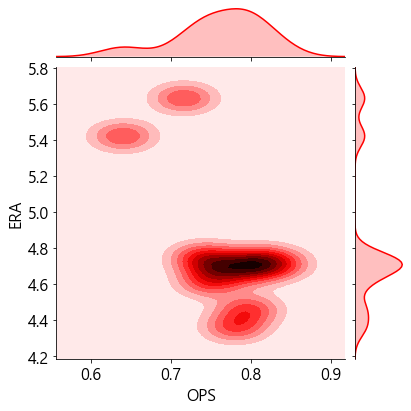

In [163]:
sns.jointplot(x = "OPS", y = "ERA", data = team_base, color = "red", kind = "kde")
plt.show()

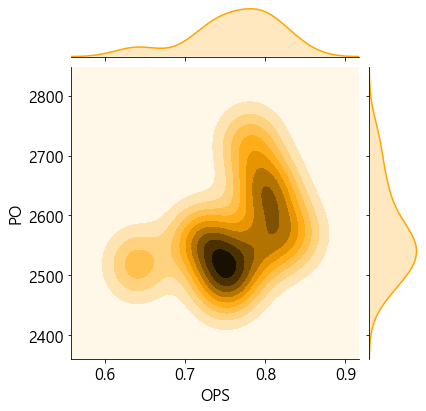

In [153]:
sns.jointplot(x = "OPS", y = "PO", data = team_base, color = "orange", kind = "kde")
plt.show()

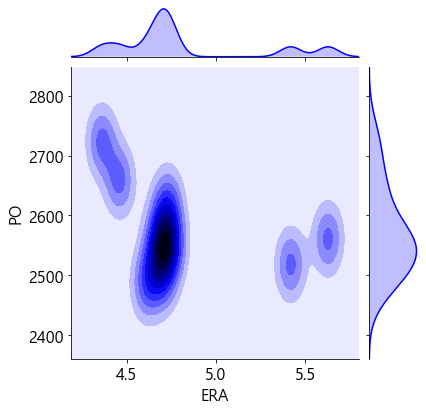

In [165]:
sns.jointplot(x = "ERA", y = "PO", data = team_base, color = "blue", kind = "kde")
plt.show()

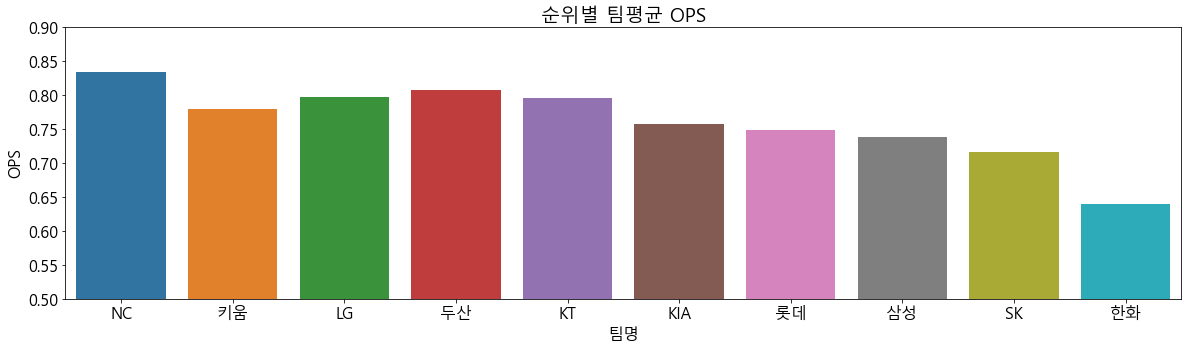

In [168]:
sns.barplot(x = "팀명", y = "OPS", data = team_base)
plt.title("순위별 팀평균 OPS")
plt.ylim([0.5,0.9])
plt.show()

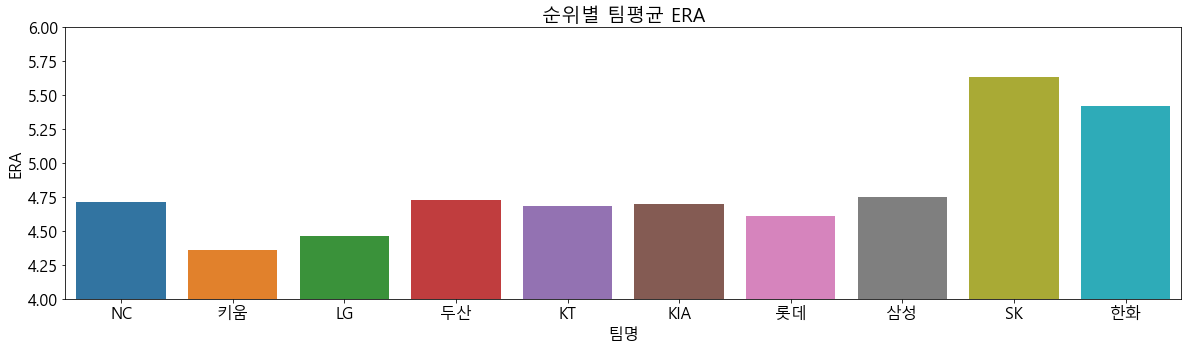

In [170]:
sns.barplot(x = "팀명", y = "ERA", data = team_base)
plt.title("순위별 팀평균 ERA")
plt.ylim([4,6])
plt.show()

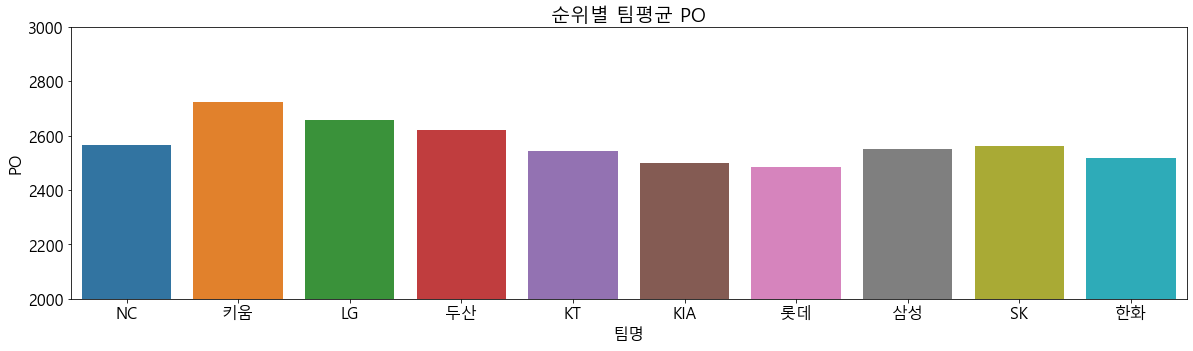

In [172]:
sns.barplot(x = "팀명", y = "PO", data = team_base)
plt.title("순위별 팀평균 PO")
plt.ylim([2000,3000])
plt.show()